**dependencies**

In [5]:
pip install librosa numpy matplotlib scipy

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install pydub

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install simpleaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.9 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for simpleaudio: filename=simpleaudio-1.0.4-cp312-cp312-macosx_11_0_arm64.whl size=2036405 sha256=37572e24620464dcce5804cfe7c2d335cfb8c76f7f9b2b576f143f241b20a1d9
  Stored in directory: /Users/lennox/Library/Caches/pip/wheels/1d/ad/93/be934a93f1ba8922256840f1cf0e59f8a21e2539985616b64f
Successfully built simpleaudio
Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install sounddevice

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# Compare 2 audios Oscar Metric

Difference Percentage: 210.10%


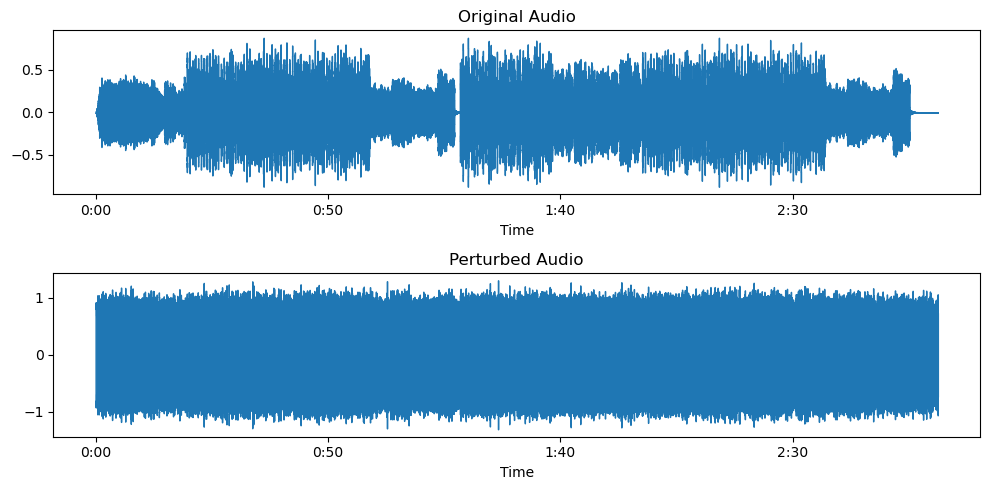

In [10]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Function to load audio and resample if necessary
def load_audio(filename, target_sr=16000):
    y, sr = librosa.load(filename, sr=target_sr)
    return y, sr

# Function to compute percentage difference between original and perturbed signals
def calculate_difference_percentage(original, perturbed):
    # Ensure both signals are of the same length
    min_length = min(len(original), len(perturbed))
    original = original[:min_length]
    perturbed = perturbed[:min_length]
    
    # Calculate the absolute difference
    diff = np.abs(original - perturbed)
    
    # Calculate the percentage difference based on amplitude
    percentage_diff = (np.sum(diff) / np.sum(np.abs(original))) * 100
    return percentage_diff

# Function to visualize the original and perturbed waveforms
def visualize_waveforms(original, perturbed, sr):
    plt.figure(figsize=(10, 5))

    plt.subplot(2, 1, 1)
    plt.title("Original Audio")
    librosa.display.waveshow(original, sr=sr)

    plt.subplot(2, 1, 2)
    plt.title("Perturbed Audio")
    librosa.display.waveshow(perturbed, sr=sr)

    plt.tight_layout()
    plt.show()

# Function to compare and visualize differences
def compare_audio(original_file, perturbed_file):
    # Load both audio files
    original, sr1 = load_audio(original_file)
    perturbed, sr2 = load_audio(perturbed_file)
    
    # Ensure both audios have the same sample rate
    assert sr1 == sr2, "Sample rates do not match!"
    
    # Calculate the difference percentage
    diff_percentage = calculate_difference_percentage(original, perturbed)
    print(f"Difference Percentage: {diff_percentage:.2f}%")
    
    # Visualize both waveforms
    visualize_waveforms(original, perturbed, sr1)

# Example usage
original_wav = '/Users/lennox/Documents/machineLearning/research/musicMask/Westy - KING OF THE NIGHT.wav'
perturbed_wav = '/Users/lennox/Documents/machineLearning/research/musicMask/Westy - KING OF THE NIGHT_with_noise.wav'

compare_audio(original_wav, perturbed_wav)


# Perturb Audio & Download

In [14]:
# Import required libraries
import numpy as np
import soundfile as sf
import librosa
import os

# Load the WAV file
def load_audio(file_path):
    audio, sr = librosa.load(file_path, sr=None)
    return audio, sr

# Pitch shifting
def perturb_pitch(audio, sr, pitch_shift):
    return librosa.effects.pitch_shift(audio, sr=sr, n_steps=pitch_shift)

# Time stretching
def perturb_time(audio, sr, stretch_factor):
    return librosa.effects.time_stretch(audio, rate=stretch_factor)

# Adding white noise
def perturb_noise(audio, noise_factor):
    noise = np.random.randn(len(audio))
    return audio + noise_factor * noise

# Save audio
def save_audio(audio, sr, file_path):
    sf.write(file_path, audio, sr)
    print(f"Saved audio to: {file_path}")

# Perturb and save audio
def perturb_and_save(file_path):
    # Load audio
    audio, sr = load_audio(file_path)
    
    # Get the directory and filename without extension
    dir_path = os.path.dirname(file_path)
    base_name = os.path.splitext(os.path.basename(file_path))[0]
    
    # Pitch shifted audio
    pitch_shifted = perturb_pitch(audio, sr, pitch_shift=2)
    pitch_shifted_path = os.path.join(dir_path, f"{base_name}_pitch_shifted.wav")
    save_audio(pitch_shifted, sr, pitch_shifted_path)
    
    # Time stretched audio
    time_stretched = perturb_time(audio, sr, stretch_factor=1.2)
    time_stretched_path = os.path.join(dir_path, f"{base_name}_time_stretched.wav")
    save_audio(time_stretched, sr, time_stretched_path)
    
    # Noisy audio
    noisy = perturb_noise(audio, noise_factor=.01)
    noisy_path = os.path.join(dir_path, f"{base_name}_with_noise.wav")
    save_audio(noisy, sr, noisy_path)
    
    return {
        'original': (audio, sr, file_path),
        'pitch_shifted': (pitch_shifted, sr, pitch_shifted_path),
        'time_stretched': (time_stretched, sr, time_stretched_path),
        'noisy': (noisy, sr, noisy_path)
    }

# Perturb and save audio files
file_path = "/Users/lennox/Documents/machineLearning/research/musicMask/Westy - KING OF THE NIGHT.wav"  # Replace with your actual file path
perturbed_files = perturb_and_save(file_path)


Saved audio to: /Users/lennox/Documents/machineLearning/research/musicMask/Westy - KING OF THE NIGHT_pitch_shifted.wav
Saved audio to: /Users/lennox/Documents/machineLearning/research/musicMask/Westy - KING OF THE NIGHT_time_stretched.wav
Saved audio to: /Users/lennox/Documents/machineLearning/research/musicMask/Westy - KING OF THE NIGHT_with_noise.wav


# Convert into mathmatical equation

In [35]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.fft import fft
from sympy import symbols, cos, sin

# Load the WAV file and extract sound waves
def extract_waveform(filename, target_sr=16000):
    audio, sr = librosa.load(filename, sr=target_sr)
    return audio, sr

# Approximate the sound wave using a Fourier Series (simplified approach)
def approximate_fourier(audio, sr, num_terms=10):
    N = len(audio)
    freqs = np.fft.fftfreq(N, 1 / sr)
    fft_coeffs = fft(audio)
    
    # Use only the first `num_terms` harmonics to create the approximation
    t = symbols('t')  # Symbol for time variable in the Fourier equation
    equation = 0
    for k in range(num_terms):
        A_k = np.real(fft_coeffs[k])
        B_k = np.imag(fft_coeffs[k])
        equation += A_k * cos(2 * np.pi * freqs[k] * t) + B_k * sin(2 * np.pi * freqs[k] * t)

    return equation

# Example usage
audio_file = '/Users/lennox/Documents/machineLearning/research/musicMask/Westy - KING OF THE NIGHT_with_noise.wav'
audio, sr = extract_waveform(audio_file)
fourier_equation = approximate_fourier(audio, sr, num_terms=50)  # Increased terms for better approximation

# Display the Fourier series approximation of the audio waveform
print("Approximate Fourier series representation of the sound wave:")
print(fourier_equation)


Approximate Fourier series representation of the sound wave:
19.6941070556641*sin(0.0346709669271442*t) - 10.0498275756836*sin(0.0693419338542884*t) - 0.511536061763763*sin(0.104012900781433*t) + 4.90836572647095*sin(0.138683867708577*t) - 13.8111610412598*sin(0.173354834635721*t) + 11.0971021652222*sin(0.208025801562865*t) + 7.54942083358765*sin(0.242696768490009*t) + 6.24523019790649*sin(0.277367735417154*t) - 13.8419504165649*sin(0.312038702344298*t) - 10.9562730789185*sin(0.346709669271442*t) + 2.7086775302887*sin(0.381380636198586*t) - 3.8184072971344*sin(0.41605160312573*t) - 6.08058309555054*sin(0.450722570052875*t) + 9.81177139282227*sin(0.485393536980019*t) - 1.93975603580475*sin(0.520064503907163*t) + 7.83247137069702*sin(0.554735470834307*t) + 4.04817771911621*sin(0.589406437761452*t) + 10.0788354873657*sin(0.624077404688596*t) - 9.94188499450684*sin(0.65874837161574*t) - 9.82381820678711*sin(0.693419338542884*t) + 0.708568811416626*sin(0.728090305470028*t) + 0.9089235067367

In [20]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.fft import fft
from sympy import symbols, cos, sin

# Load the WAV file and extract sound waves
def extract_waveform(filename, target_sr=16000):
    audio, sr = librosa.load(filename, sr=target_sr)
    return audio, sr

# Approximate the sound wave using a Fourier Series (simplified approach)
def approximate_fourier(audio, sr, num_terms=10):
    N = len(audio)
    freqs = np.fft.fftfreq(N, 1 / sr)
    fft_coeffs = fft(audio)
    
    # Use only the first `num_terms` harmonics to create the approximation
    t = symbols('t')  # Symbol for time variable in the Fourier equation
    equation = 0
    for k in range(num_terms):
        A_k = np.real(fft_coeffs[k])
        B_k = np.imag(fft_coeffs[k])
        equation += A_k * cos(2 * np.pi * freqs[k] * t) + B_k * sin(2 * np.pi * freqs[k] * t)

    return equation

# Example usage
audio_file = '/Users/lennox/Documents/machineLearning/research/musicMask/Westy - KING OF THE NIGHT.wav'
audio, sr = extract_waveform(audio_file)
fourier_equation = approximate_fourier(audio, sr)

# Display the Fourier series approximation of the audio waveform
print("Approximate Fourier series representation of the sound wave:")
print(fourier_equation)



Approximate Fourier series representation of the sound wave:
1.76469945907593*sin(0.0346709669271442*t) - 5.0211009979248*sin(0.0693419338542884*t) - 0.218808740377426*sin(0.104012900781433*t) + 1.58454978466034*sin(0.138683867708577*t) - 3.33678030967712*sin(0.173354834635721*t) + 3.55661630630493*sin(0.208025801562865*t) + 0.0878721103072166*sin(0.242696768490009*t) - 0.788917720317841*sin(0.277367735417154*t) - 5.47626924514771*sin(0.312038702344298*t) - 4.89523220062256*cos(0.0346709669271442*t) - 7.48710536956787*cos(0.0693419338542884*t) - 6.29960441589355*cos(0.104012900781433*t) + 7.37603092193604*cos(0.138683867708577*t) - 0.149119153618813*cos(0.173354834635721*t) + 4.38720941543579*cos(0.208025801562865*t) + 2.9893159866333*cos(0.242696768490009*t) - 0.451619505882263*cos(0.277367735417154*t) + 10.0801830291748*cos(0.312038702344298*t) + 18.7619438171387


In [37]:
import numpy as np
import soundfile as sf
import sounddevice as sd
from sympy import lambdify, symbols

# Generate sound from a mathematical equation
def equation_to_music(equation, duration=2, sr=16000):
    t_vals = np.linspace(0, duration, int(sr * duration))
    
    # Convert the symbolic equation into a numeric function
    t = symbols('t')
    numeric_func = lambdify(t, equation, 'numpy')
    
    # Generate the sound signal from the equation
    sound_wave = numeric_func(t_vals)
    
    # Normalize the wave to ensure it's within valid audio range
    sound_wave = sound_wave / np.max(np.abs(sound_wave))
    
    # Handle the possibility of NaN or infinite values
    sound_wave = np.nan_to_num(sound_wave)

    return sound_wave, sr

# Play the generated audio
def play_generated_audio(sound_wave, sr):
    sd.play(sound_wave, sr)
    sd.wait()

# Example usage: expand the Fourier series approximation to more terms
generated_sound, sr = equation_to_music(fourier_equation, duration=5)  # Extend to 5 seconds
play_generated_audio(generated_sound, sr)
